### IMPORT LIBRARY & DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,customer_id,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,1993-08-17,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4yrs 4mon,0
1,672,2007-12-17,Female,1.0,Yes,NaN,0.0,89236.34,2266076.58,4yrs 1mon,0
2,5670,2000-02-05,Female,1.0,Yes,NaN,0.0,171553.12,1779347.34,0yrs 9mon,0
3,2975,1999-11-16,Female,1.0,Yes,NaN,0.0,85979.04,2014246.24,1yrs 8mon,0
4,3883,1977-08-18,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0yrs 10mon,0
5,7825,2002-04-18,Male,1.0,Yes,NaN,0.0,0.00,2390347.61,0yrs 0mon,0
6,6676,1995-08-17,NaN,1.0,No,Salaried,1.0,38546.17,5190882.42,1yrs 1mon,0
7,7991,1984-04-16,Male,1.0,No,Salaried,0.0,0.00,7112035.30,0yrs 0mon,0
8,9412,1998-12-27,Female,1.0,No,Salaried,1.0,103848.03,6455858.31,2yrs 6mon,0
9,9464,1981-03-12,Female,1.0,No,Salaried,0.0,0.00,3444624.30,0yrs 0mon,0


In [3]:
df.shape

(3693, 11)

In [4]:
df.describe()

,customer_id,phone_flag,credit_card,balance,income,default
count,3693.000000,3693.000000,3682.000000,3693.000000,3.693000e+03,3693.000000
mean,4987.203628,0.666125,0.272406,105243.306030,3.995800e+06,0.069050
std,2877.077317,0.471660,0.445258,61087.950942,1.602374e+06,0.253573
min,7.000000,0.000000,0.000000,0.000000,3.243579e+05,0.000000
25%,2463.000000,0.000000,0.000000,62023.850000,2.518968e+06,0.000000
50%,4953.000000,1.000000,0.000000,102671.610000,4.117235e+06,0.000000
75%,7487.000000,1.000000,1.000000,145943.420000,5.235604e+06,0.000000
max,10000.000000,1.000000,1.000000,318518.710000,8.548626e+06,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   3693 non-null   int64  
 1   customer_bod  3693 non-null   object 
 2   gender        3385 non-null   object 
 3   phone_flag    3693 non-null   float64
 4   student       3693 non-null   object 
 5   employment    2701 non-null   object 
 6   credit_card   3682 non-null   float64
 7   balance       3693 non-null   float64
 8   income        3693 non-null   float64
 9   tenure        3693 non-null   object 
 10  default       3693 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 317.5+ KB


### PREPROCESSING THE DATASET

In [6]:
df.isnull().sum()

customer_id       0
customer_bod      0
gender          308
phone_flag        0
student           0
employment      992
credit_card      11
balance           0
income            0
tenure            0
default           0
dtype: int64

In [7]:
# fill the missing values for categorical terms - mode
df['gender'] = df["gender"].fillna(df['gender'].mode()[0])
df['employment'] = df["employment"].fillna(df['employment'].mode()[0])
df['credit_card'] = df["credit_card"].fillna(df['credit_card'].mode()[0])

df.isnull().sum()

customer_id     0
customer_bod    0
gender          0
phone_flag      0
student         0
employment      0
credit_card     0
balance         0
income          0
tenure          0
default         0
dtype: int64

### EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='gender', ylabel='count'>

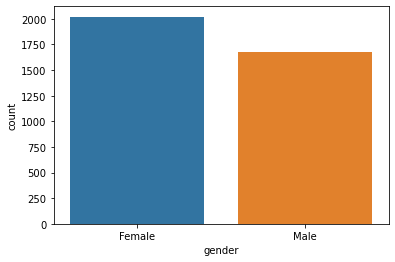

In [8]:
# categorical attributes visualization
sns.countplot(df['gender'])

<AxesSubplot:xlabel='phone_flag', ylabel='count'>

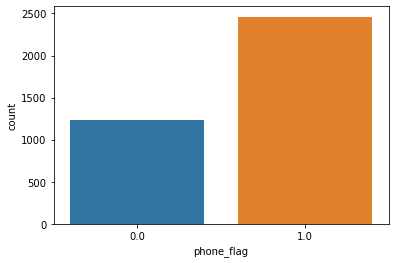

In [9]:
sns.countplot(df['phone_flag'])

<AxesSubplot:xlabel='student', ylabel='count'>

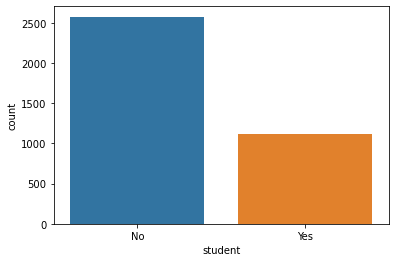

In [10]:
sns.countplot(df['student'])

<AxesSubplot:xlabel='employment', ylabel='count'>

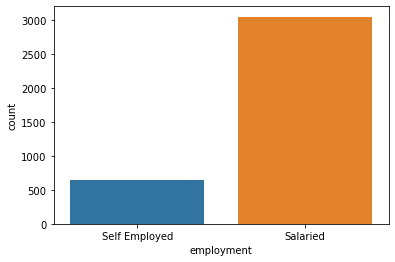

In [11]:
sns.countplot(df['student'])

<AxesSubplot:xlabel='credit_card', ylabel='count'>

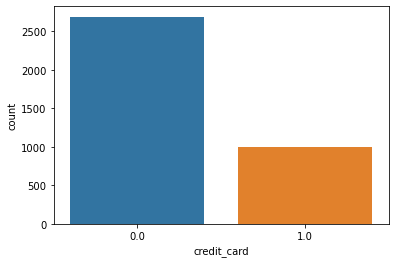

In [12]:
sns.countplot(df['credit_card'])

<AxesSubplot:xlabel='balance', ylabel='Density'>

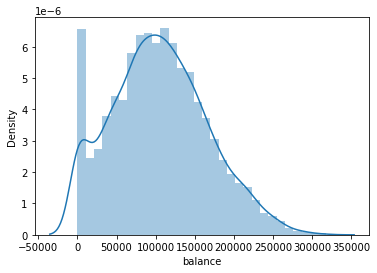

In [13]:
sns.distplot(df["balance"])

<AxesSubplot:xlabel='income', ylabel='Density'>

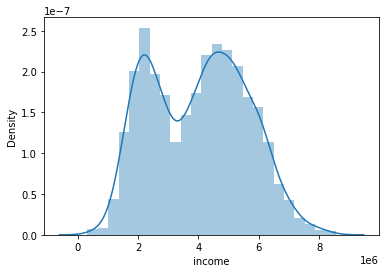

In [14]:
sns.distplot(df["income"])

In [15]:
df.head()

,customer_id,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,1993-08-17,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4yrs 4mon,0
1,672,2007-12-17,Female,1.0,Yes,Salaried,0.0,89236.34,2266076.58,4yrs 1mon,0
2,5670,2000-02-05,Female,1.0,Yes,Salaried,0.0,171553.12,1779347.34,0yrs 9mon,0
3,2975,1999-11-16,Female,1.0,Yes,Salaried,0.0,85979.04,2014246.24,1yrs 8mon,0
4,3883,1977-08-18,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0yrs 10mon,0


### LOG TRANSFORMATION 

<AxesSubplot:xlabel='income', ylabel='Density'>

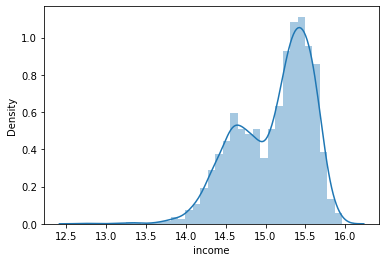

In [16]:
df['income'] = np.log(df['income']+1)
sns.distplot(df["income"])

<AxesSubplot:xlabel='balance', ylabel='Density'>

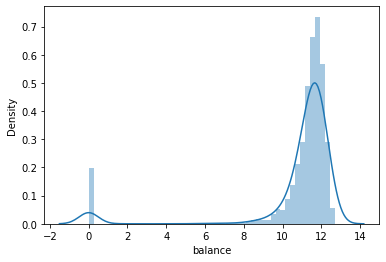

In [17]:
df['balance'] = np.log(df['balance']+1)
sns.distplot(df["balance"])

### CORRELATION MATRIX

<AxesSubplot:>

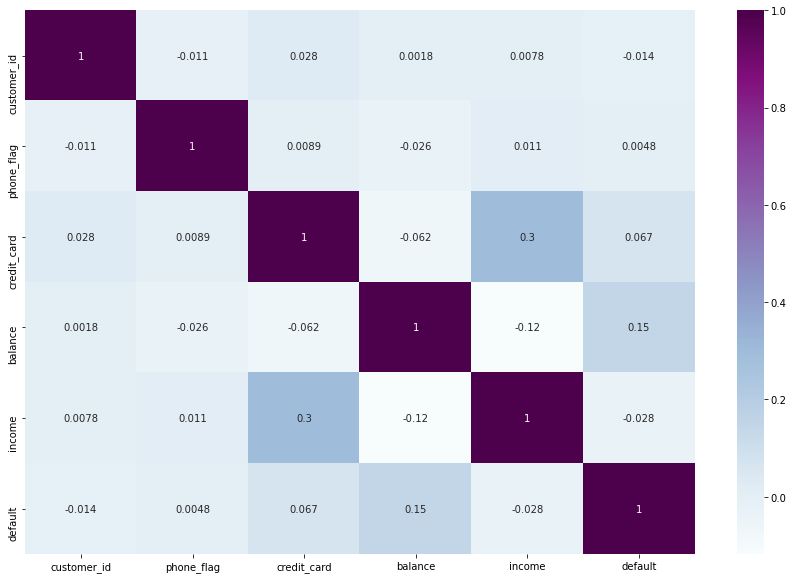

In [18]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [19]:
df.head()

,customer_id,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,1993-08-17,Female,1.0,No,Self Employed,1.0,11.374871,15.427968,4yrs 4mon,0
1,672,2007-12-17,Female,1.0,Yes,Salaried,0.0,11.399055,14.633561,4yrs 1mon,0
2,5670,2000-02-05,Female,1.0,Yes,Salaried,0.0,12.052654,14.391758,0yrs 9mon,0
3,2975,1999-11-16,Female,1.0,Yes,Salaried,0.0,11.361870,14.515756,1yrs 8mon,0
4,3883,1977-08-18,Male,1.0,No,Salaried,0.0,10.797037,15.510236,0yrs 10mon,0


In [20]:
# drop unnecessary columns
cols = ['customer_id','balance','income']
df = df.drop(columns=cols, axis=1)
df.head()

# 'customer_bod','gender','phone_flag','student','employment','credit_card','tenure','default'

,customer_bod,gender,phone_flag,student,employment,credit_card,tenure,default
0,1993-08-17,Female,1.0,No,Self Employed,1.0,4yrs 4mon,0
1,2007-12-17,Female,1.0,Yes,Salaried,0.0,4yrs 1mon,0
2,2000-02-05,Female,1.0,Yes,Salaried,0.0,0yrs 9mon,0
3,1999-11-16,Female,1.0,Yes,Salaried,0.0,1yrs 8mon,0
4,1977-08-18,Male,1.0,No,Salaried,0.0,0yrs 10mon,0


### LABEL ENCODING

In [21]:
from sklearn.preprocessing import LabelEncoder
cols = ['customer_bod','gender','phone_flag','student','employment','credit_card','tenure','default']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [22]:
df.head()

,customer_bod,gender,phone_flag,student,employment,credit_card,tenure,default
0,1155,0,1,0,1,1,51,0
1,2752,0,1,1,0,0,48,0
2,2005,0,1,1,0,0,8,0
3,1971,0,1,1,0,0,19,0
4,153,1,1,0,0,0,1,0


### TRAIN-TEST SPLIT

In [23]:
# specify input and output attributes
X = df.drop(columns=['default'], axis=1)
y = df['default']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### MODEL TRAINING

In [25]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 93.18181818181817
Cross validation is 93.12210523999693


In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 88.85281385281385
Cross validation is 88.00374783179497


In [28]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 92.42424242424242
Cross validation is 92.06592810177087


In [29]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 91.34199134199135
Cross validation is 91.28049697276403


In [30]:
# from sklearn.metrics import f1_score
# model = F1Score()
# classify(model, X, y)

model.score(X,y)

0.9783373950717574

### HYPERPARAMETER TUNING

In [31]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 93.18181818181817
Cross validation is 93.09504164053818


### CONFUSION MATRIX

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [32]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[844,  17],
       [ 56,   7]], dtype=int64)

<AxesSubplot:>

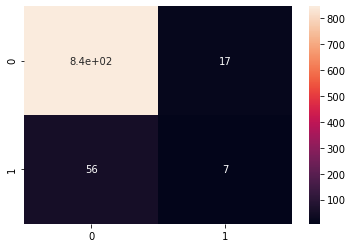

In [34]:
sns.heatmap(cm, annot=True)

In [35]:
y.value_counts()

0    3438
1     255
Name: default, dtype: int64

In [ ]:
from sklearn.metrics import f1_score

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


model_dc = DecisionTreeClassifier(criterion='entropy')
model_rf = RandomForestClassifier(criterion='entropy')
model_gb = GradientBoostingClassifier()

model_dc.fit(x_train,y_train)
model_rf.fit(x_train,y_train)
model_gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [37]:
df = pd.read_csv("test.csv")
df.head(10)

,customer_id,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure
0,9365,1999-10-22,Male,0.0,No,Salaried,1.0,0.00,4430744.15,0yrs 0mon
1,999,1987-05-03,Female,0.0,No,Salaried,0.0,67431.40,3743149.53,0yrs 7mon
2,2835,2000-10-20,Male,1.0,No,Salaried,1.0,69128.28,4821579.61,1yrs 11mon
3,5821,1994-07-13,Male,1.0,No,Salaried,0.0,151051.78,3159764.69,0yrs 10mon
4,2330,1996-10-03,Male,0.0,No,Self Employed,0.0,92727.85,5659353.20,1yrs 3mon
5,5753,2003-08-17,Male,0.0,Yes,NaN,0.0,178980.90,2836339.78,2yrs 5mon
6,7063,1992-06-17,Female,1.0,No,Salaried,0.0,58252.85,4638774.56,2yrs 4mon
7,2007,1999-01-25,Male,0.0,No,Salaried,0.0,91757.42,5892113.81,4yrs 0mon
8,9600,1981-06-03,Male,0.0,No,Salaried,1.0,561.53,5348604.75,0yrs 7mon
9,4682,1999-02-21,Male,1.0,No,Self Employed,0.0,178616.39,4374866.79,4yrs 3mon


In [38]:
predict_dc = model_dc.predict(x_test)
predict_rf = model_rf.predict(x_test)
predict_gb = model_gb.predict(x_test)

In [51]:
pd.DataFrame({
    'Actual' : y_test,
    'Decision Tree' : predict_dc,
    'Random Forest' : predict_rf,
    'Gradient Boost' : predict_gb
})

,Actual,Decision Tree,Random Forest,Gradient Boost
393,0,0,0,0
3560,0,0,0,0
551,0,0,0,0
1295,0,0,0,0
818,0,0,0,0
...,...,...,...,...
3109,0,0,0,0
572,0,0,0,0
1431,0,0,0,0
2948,0,0,0,0
